1) Clone https://github.com/adamnguyenitvn/UIT_bigdata_labs_2019

2) Open Forecasting.ipynb

3) Make a copy of Forecasting.ipynb, name it with your studentID.ipynb

4) Do the exercise

5) Push your Jupyter notebook to github

Note that you should use Python 3 for all exercises.

In [2]:
#make necesarry imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import sys, os
from contextlib import contextmanager
import matplotlib as mpl
import seaborn as sns
import sklearn

# Forecasting

In [5]:
df = pd.read_csv('data.csv')
df

,Period,Sales
0,1,5384
1,2,8081
2,3,10282
3,4,9156
4,5,6118
5,6,9139
6,7,12460
7,8,10717
8,9,7825
9,10,9693


## 1. Visualize and interprete the pattern of this time-series

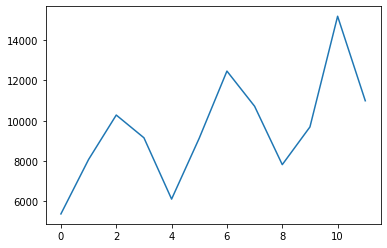

In [6]:
plt.plot(df['Sales'])
plt.show()

In [48]:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

(0, 5)

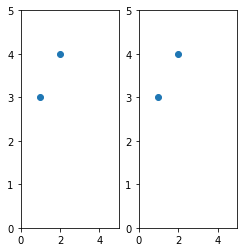

In [57]:
ax1 = plt.subplot(131)
ax1.scatter([1, 2], [3, 4])
ax1.set_xlim([0, 5])
ax1.set_ylim([0, 5])


ax2 = plt.subplot(132)
ax2.scatter([1, 2],[3, 4])
ax2.set_xlim([0, 5])
ax2.set_ylim([0, 5])

## 2. Predict future demand in the four next quarters without seasonality

### Using moving average

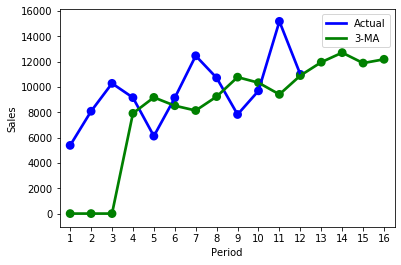

In [86]:
# Using moving average
def moving_average(df, k, to_period):
    #Prepare Output data
    moving_average_df = pd.DataFrame(0,index= np.arange(0, to_period,1, int), columns=['Period','Sales'])
    moving_average_df['Period'] = np.arange(1, to_period+1, 1, int)
    
    #Prepare Input data
    df_copy = df.copy().values.tolist()
    #Add more data entries
    for i in range(len(df.index), to_period, 1):
        df_copy.append([i+1,0])
    df_copy = pd.DataFrame(df_copy, columns=['Period', 'Sales'])
    
    #Calculate Output data
    for i in range(k, to_period, 1):
        moving_average_df.loc[i, ['Sales']] = df_copy.loc[i-3:i-1, ['Sales']].values.mean(axis=0)
        if (df_copy.loc[i, ['Sales']].values == 0):
             df_copy.loc[i, ['Sales']] = moving_average_df.loc[i, ['Sales']]
    return moving_average_df

f, ax = plt.subplots(1,1)
ma_df = moving_average(df, 3, 16)
sns.pointplot(x='Period', y='Sales', data=df, color='b')
sns.pointplot(x='Period', y='Sales', data=ma_df, color='g')
ax.legend(handles=ax.lines[::len(df)+1], labels=["Actual", "3-MA"])
plt.show()

### Using exponential smoothing

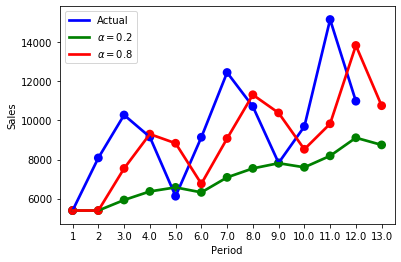

Sales    6314.48
Name: 5, dtype: object

In [149]:
def exponential_smoothing(df, alpha):
    #Prepare Output data
    es_df = pd.DataFrame(columns=['Period','Sales'])
    
    es_df = es_df.append([df.iloc[0]])
    es_df.loc[1] = [2, df.loc[0, ['Sales']].values[0]]
    es_df = es_df.reset_index(drop=True)
    #Calculate Output data
    for i in range(2, len(df.index)+1, 1):
        sale_values = es_df.loc[i-2, ['Sales']].values[0]*(1-alpha) + df.loc[i-1, ['Sales']].values[0]*alpha
        es_df.loc[i] = [i+1, sale_values]
    return es_df

f, ax = plt.subplots(1, 1)
es_df_02 = exponential_smoothing(df, 0.2)
es_df_08 = exponential_smoothing(df, 0.8)
sns.pointplot(ax=ax, x='Period', y='Sales', data=df, color='b')
sns.pointplot(ax=ax, x='Period', y='Sales', data=es_df_02, color='g')
sns.pointplot(ax=ax, x='Period', y='Sales', data=es_df_08, color='r')

ax.legend(handles=ax.lines[::len(df)+2], labels=["Actual", r'$\alpha=0.2$', r"$\alpha=0.8$"])
plt.show()

### Using linear regression

In [6]:
def linear_regression(df):
    #y = a+b*x
    
    # TODO: Add your code here
    ...
    # End of your coding
    return a,b

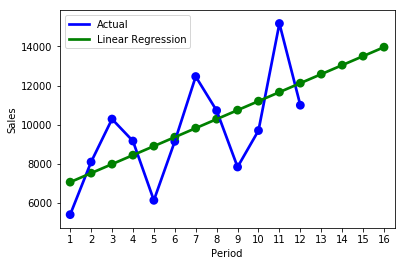

In [7]:
a,b = linear_regression(df)
linear_df = pd.DataFrame(columns=['Period','Sales'])
for m in range(1, 17):
    sale = a + b * m
    linear_df.loc[m-1] = [m,sale]
linear_df['Period'] = linear_df['Period'].astype(int)

f, ax = plt.subplots(1, 1)
sns.pointplot(ax=ax, x='Period', y='Sales', data=df, color='b')
sns.pointplot(ax=ax, x='Period', y='Sales', data=linear_df, color='g')

ax.legend(handles=ax.lines[::len(df)+2], labels=["Actual", "Linear Regression"])
plt.show()

## 3. Predict future demand in the four next quarters with seasonality (Optional)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:31: RankWarning: Polyfit may be poorly conditioned


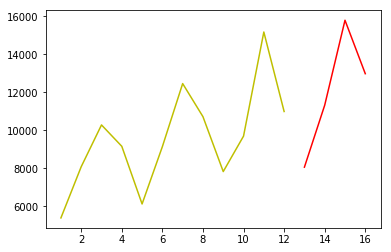

In [8]:
#season function
def get_season(row):
    if row['Period'] >= 5 and row['Period'] <= 8:
        return 'II'
    elif row['Period'] >= 9 and row['Period'] <= 12:
        return 'III'
    else:
        return 'I'
def get_seq(row):
    return row['Period']%4 and row['Period']%4 or 4

def predict_with_seasonality(df, months):
    # TODO: Add your code here
    ...
    # End of your coding
    return forecast_df

season_df = predict_with_seasonality(df, [13,14,15,16])

f, ax = plt.subplots(1, 1)
plt.plot(df['Period'], df['Sales'], c='y')
plt.plot(season_df['Period'], season_df['Sales'], c='r')
plt.show()

# 4.Evaluation: compare the above implemented methods

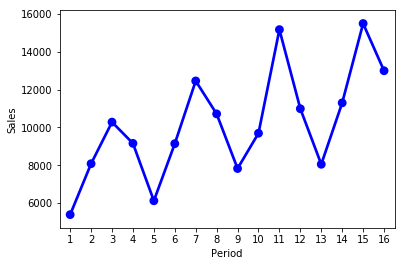

In [9]:
eval_df = pd.read_csv('actual.csv')
eval_df = pd.concat([df, eval_df], ignore_index=True)
sns.pointplot(x='Period', y='Sales', data=eval_df, color='b')

In [10]:
MAD = np.absolute(eval_df['Sales'][12:16] - moving_average(eval_df, 3, 16)['Sales'][12:16]).mean()
print("MAD of {0}: {1}".format("3-MA", MAD))
MAD = np.absolute(eval_df['Sales'][12:16] - exponential_smoothing(eval_df, 0.2)['Sales'][12:16]).mean()
print("MAD of {0}: {1}".format("Exponential smoothing with alpha=0.2", MAD))
MAD = np.absolute(eval_df['Sales'][12:16] - exponential_smoothing(eval_df, 0.8)['Sales'][12:16]).mean()
print("MAD of {0}: {1}".format("Exponential smoothing with alpha=0.8", MAD))
MAD = np.absolute(eval_df['Sales'][12:16] - linear_df['Sales'][12:16]).mean()
print("MAD of {0}: {1}".format("Linear Regression", MAD))
MAD = np.absolute(eval_df['Sales'][12:16] - season_df['Sales'][0:4]).mean()
print("MAD of {0}: {1}".format("Seasonality Method", MAD))

MAD of 3-MA: 2694.75
MAD of Exponential smoothing with alpha=0.2: 2707.7580143305513
MAD of Exponential smoothing with alpha=0.8: 3088.7232615120074
MAD of Linear Regression: 2309.1480186480185
MAD of Seasonality Method: 85.88221407247761


In [13]:
MSE = (eval_df['Sales'][12:16] - moving_average(eval_df, 3, 16)['Sales'][12:16])**2
MSE = MSE.mean()
print("MSE of {0}: {1}".format("3-MA", MSE))
MSE = (eval_df['Sales'][12:16] - exponential_smoothing(eval_df, 0.2)['Sales'][12:16])**2
MSE = MSE.mean()
print("MSE of {0}: {1}".format("Exponential smoothing with alpha=0.2", MSE))
MSE = (eval_df['Sales'][12:16] - exponential_smoothing(eval_df, 0.8)['Sales'][12:16])**2
MSE = MSE.mean()
print("MSE of {0}: {1}".format("Exponential smoothing with alpha=0.8", MSE))
MSE = (eval_df['Sales'][12:16] - linear_df['Sales'][12:16])**2
MSE = MSE.mean()
print("MSE of {0}: {1}".format("Linear Regression", MSE))
MSE = (eval_df['Sales'][12:16] - season_df['Sales'][0:4])**2
MSE = MSE.mean()
print("MSE of {0}: {1}".format("Seasonality Method", MSE))

MSE of 3-MA: 11544241.36111111
MSE of Exponential smoothing with alpha=0.2: 9744054.271861337
MSE of Exponential smoothing with alpha=0.8: 10909182.694821384
MSE of Linear Regression: 7123661.909756519
MSE of Seasonality Method: 22206.08964632527


# Give your conclusion about the above forecastings